In [3]:
import random
import os

import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image
from torch.utils.data import DataLoader

In [4]:
hr_path = "../../data/DIV2K_HR/DIV2K_train_HR_sub"
lr_path = "../../data/DIV2K_HR/DIV2K_train_LR_bicubic/X4_sub"

In [17]:
hr_file_list = os.listdir(hr_path)
lr_file_list = os.listdir(lr_path)

In [19]:
hr_img_file = hr_file_list[0]
lr_img_file = lr_file_list[0]

In [33]:
hr_img = Image.open(os.path.join(hr_path, hr_img_file))
lr_img = Image.open(os.path.join(lr_path, lr_img_file))

In [26]:
hr_img = np.array(hr_img)
lr_img = np.array(lr_img)

In [28]:
scale = 4
hr_patch_size = 128
lr_patch_size = hr_patch_size // scale

In [29]:
lr_idx = random.randint(0, lr_img.shape[0] - lr_patch_size)
lr_idy = random.randint(0, lr_img.shape[1] - lr_patch_size)

In [34]:
hr_img_crop = transforms.RandomCrop((hr_patch_size, hr_patch_size))(hr_img)

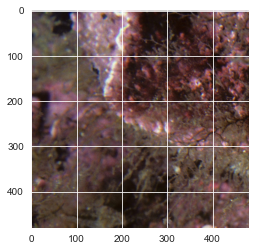

In [37]:
plt.imshow(hr_img)

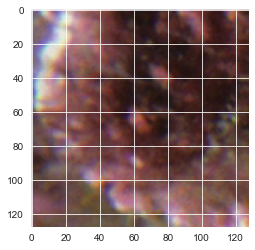

In [38]:
plt.imshow(hr_img_crop)

In [5]:
hr_transform = transforms.Compose([
    transforms.RandomCrop((hr_patch_size, hr_patch_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=90),
    transforms.ToTensor()
])
lr_transform = transforms.Compose([
    transforms.RandomCrop((lr_patch_size, lr_patch_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=90),
    transforms.ToTensor()
])

NameError: name 'hr_patch_size' is not defined

In [ ]:
from dataset import DIV2KDataset

In [2]:
DIV2K_dataset = DIV2KDataset(hr_path, lr_path, hr_transform, lr_transform)

NameError: name 'DIV2KDataset' is not defined

In [43]:
train_data = DataLoader(DIV2K_dataset, batch_size=16, shuffle=True, num_workers=2)

In [44]:
from icecream import ic
for i, (hr_data, lr_data) in enumerate(train_data):
    if i == 3:
        break
    ic(hr_data.shape, lr_data.shape)

ic| hr_data.shape: torch.Size([16, 3, 128, 128])
    lr_data.shape: torch.Size([16, 3, 32, 32])
ic| hr_data.shape: torch.Size([16, 3, 128, 128])
    lr_data.shape: torch.Size([16, 3, 32, 32])
ic| hr_data.shape: torch.Size([16, 3, 128, 128])
    lr_data.shape: torch.Size([16, 3, 32, 32])
